In [46]:
%matplotlib inline

n=0

def plot_line(X, y, w):
    global n
    n += 1
    fig = plt.figure(n)
    ax = fig.gca()  
    
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30)

    a = -w[0] / w[1]
    b = -w[2] / w[1]

    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    xx = np.linspace(xmin, xmax)
    yy = a * xx + b

    # Plot the hyperplane
    ax.plot(xx, yy)

    ax.set_autoscale_on(False)
    ax.axis([xmin, xmax, ymin, ymax])
     
    return

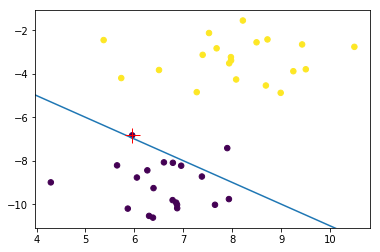

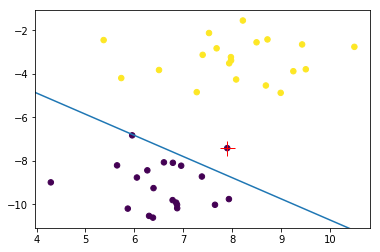

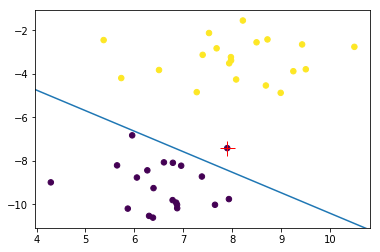

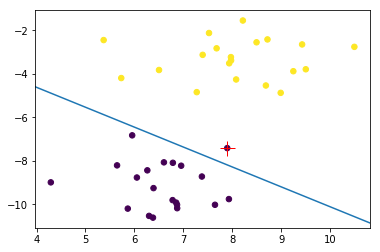

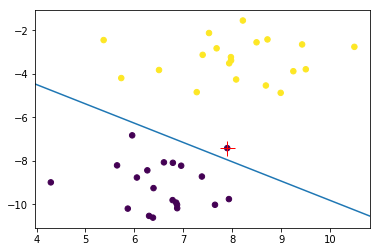

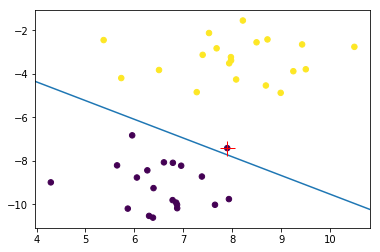

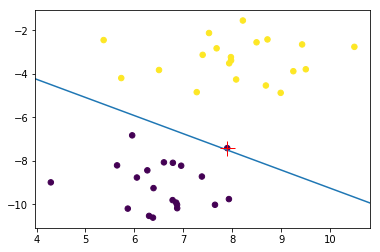

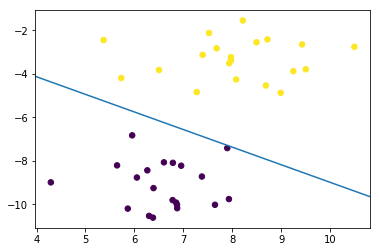

In [47]:
######################################### 
# my implementation of a perceptron

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# we create separable points
X, y = make_blobs(n_samples=40, centers=2, random_state=6)

# add the constant 1 as the extra dimension to facilitate computating w
T = X.tolist()
[x.append(1) for x in T]
X = np.array(T)

# make labels of 0,1 into -1,1, so as to follow perceptron algorithm
T = y.tolist()
T = [ 1 if x==0 else -1 for x in T]
y = np.array(T)

# print(X)
# print(y)

def percep(X, Y, max_iter=10, eta=0.002):
    
    w = np.ones(len(X[0]))
    for t in range(max_iter):
        for i, x in enumerate(X):
            res = np.dot(X[i], w)*Y[i]
            if res <= 0:
                # draw the current line, and the misclassified point X[i]
                plot_line(X, Y, w); 
                plt.plot(X[i,0], X[i,1], c="red", marker='+', markersize=15);    

                w = w + eta*X[i]*Y[i]
            
    return w

w = percep(X, y)
# print(w)

plot_line(X, y, w)

plt.show()

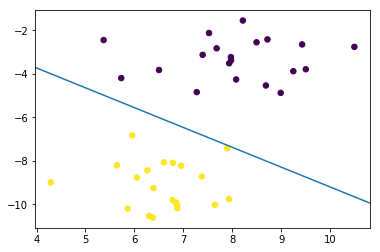

In [48]:
######################################### 
# directly invoke sklearn's perceptron

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.linear_model import perceptron


# we create 40 separable points
X, y = make_blobs(n_samples=40, centers=2, random_state=6)

# print(X)
# print(y)

net = perceptron.Perceptron(max_iter=100, eta0=0.002)
net.fit(X, y)

# intercept + w0*x0 + w1*x1 = 0 , or, x1 = a * x0 + b
w = [net.coef_[0,0], net.coef_[0,1], net.intercept_[0]]
# print(w)

plot_line(X, y, w)

plt.show()